# Clustering Crypto

In [31]:
# Initial imports
import pandas as pd
import os
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


### Deliverable 1: Preprocessing the Data for PCA

In [32]:
# Load the crypto_data.csv dataset.
file = os.path.join("Resources", "crypto_data.csv")
crypto_df = pd.read_csv(file, index_col= 0)
crypto_df_copy = pd.read_csv(file, index_col= 0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000


In [33]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df.IsTrading == True]

In [34]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop(["IsTrading"], axis='columns')
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [35]:
# Remove rows that have at least 1 null value
print(crypto_df.isna().sum())
crypto_df = crypto_df.dropna()
crypto_df.head(10)

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.14E+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0


In [36]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df.TotalCoinsMined > 0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.14E+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [37]:
# Create a new DataFrame that holds only the cryptocurrencies names.
cryptocurrencies_names_df = pd.DataFrame(crypto_df,columns=['CoinName'])
cryptocurrencies_names_df = cryptocurrencies_names_df.drop_duplicates()
cryptocurrencies_names_df.head()

,CoinName
,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [38]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop(["CoinName"], axis='columns')
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,3.14E+11
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [39]:
# Use get_dummies() to create variables for text features.
crypto_df2 = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
crypto_df2

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.14E+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Standardize the data with StandardScaler().
scaled_crypto_df = StandardScaler().fit_transform(crypto_df2)
scaled_crypto_df

array([[-0.11710444, -0.1528531 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.0939656 , -0.14499112, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.5249554 ,  4.48749054, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09560943, -0.13216038, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694444, -0.15254276, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710163, -0.15283832, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [41]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_fit = pca.fit_transform(scaled_crypto_df)

In [42]:
cryptocurrencies_names_df.shape

(531, 1)

In [43]:
crypto_df.index

Index(['42', '404', '1337', 'BTC', 'ETH', 'LTC', 'DASH', 'XMR', 'ETC', 'ZEC',
       ...
       'TCH', 'WAVES', 'PART', 'BTT', 'NXT', 'ZEPH', 'GAP', 'BDX', 'ZEN',
       'XBC'],
      dtype='object', name=' ', length=532)

In [44]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data=crypto_fit, columns=["PC 1", "PC 2", "PC 3"], index = crypto_df2.index
)
pcs_df.head()

,PC 1,PC 2,PC 3
,,,
42,-0.337065,1.051581,-0.551172
404,-0.320440,1.051894,-0.551524
1337,2.305618,1.646502,-0.609044
BTC,-0.152633,-1.346843,0.197824
ETH,-0.153878,-2.033746,0.380898


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [45]:
# Create an elbow curve to find the best value for K.
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")


c:\Users\mugun\anaconda3\envs\mlenv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



    k      inertia
0   1  3640.762954
1   2  2477.095150
2   3  1474.940842
3   4   488.577713
4   5   289.189422
5   6   224.666631
6   7   194.399308
7   8   152.081981
8   9   128.735561
9  10   107.537303


:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [46]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=42)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

In [47]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = data = pd.concat([crypto_df, pcs_df], axis=1, sort = False)

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df["CoinName"] = crypto_df_copy['CoinName']

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.337065,1.051581,-0.551172,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.320440,1.051894,-0.551524,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,3.14E+11,2.305618,1.646502,-0.609044,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.152633,-1.346843,0.197824,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.153878,-2.033746,0.380898,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.166168,-1.113391,-0.024882,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.399346,1.266546,-0.463081,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.157630,-2.192960,0.330121,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.152324,-2.033835,0.380887,Ethereum Classic,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [54]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    hover_name = "CoinName",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [49]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [50]:
# Print the total number of tradable cryptocurrencies.
number_of_tradeable_currencies = clustered_df['TotalCoinsMined'].count()
number_of_tradeable_currencies

print(f"There are {number_of_tradeable_currencies} tradable cryptocurrencies.")

There are 532 tradable cryptocurrencies.


In [57]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
min_max_data = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])
min_max_data

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06584329e-03],
       [3.14000000e-01, 2.95751763e-02],
       ...,
       [1.40022261e-03, 9.90123791e-04],
       [2.10000000e-05, 7.37019748e-06],
       [1.00000000e-06, 1.29580804e-07]])

In [62]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(min_max_data, columns= ['TotalCoinSupply', 'TotalCoinsMined'], index= clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName"] = clustered_df["CoinName"]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"] = clustered_df["Class"]

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
,,,,
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.140000e-01,0.029575,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,1
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0


In [64]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
plot_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class")

:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply)

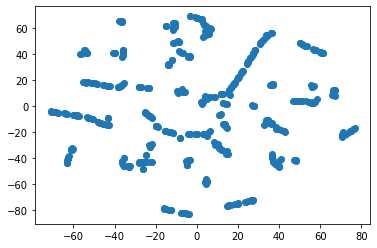

In [79]:
from sklearn.manifold import TSNE
model = TSNE()

tsne_data = model.fit_transform(pcs_df)
plt.scatter(tsne_data[:,0], tsne_data[:,1])
